In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from config import Archive_Path
from os.path import join

In [6]:
# Import the data from Archive
data_background = pd.read_csv(join(Archive_Path,"New_Data","dileptonic","ttbar_2L.csv"))
data_sinal = pd.read_hdf(join(Archive_Path,"New_Data","signal","tZFCNC.h5"))

In [8]:
# Erase non experimental data and organize columns
data_background.drop(['gen_decay1', 'gen_decay2', 'MissingET_Eta', 'gen_sample', 'gen_decay_filter'], axis=1, inplace=True)
data_sinal.drop(['gen_decay1', 'gen_decay2', 'gen_xsec','MissingET_Eta'], axis=1, inplace=True)

# Organize columns
data_background.sort_index(axis=1, inplace=True)
data_sinal.sort_index(axis=1, inplace=True)

In [5]:
# Check if it successfully imported background data
# data_background.head()
data_background.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Electron1_Eta   500000 non-null  float64
 1   Electron1_PT    500000 non-null  float64
 2   Electron1_Phi   500000 non-null  float64
 3   Electron2_Eta   500000 non-null  float64
 4   Electron2_PT    500000 non-null  float64
 5   Electron2_Phi   500000 non-null  float64
 6   Electron_Multi  500000 non-null  int64  
 7   FatJet1_Eta     500000 non-null  float64
 8   FatJet1_Mass    500000 non-null  float64
 9   FatJet1_PT      500000 non-null  float64
 10  FatJet1_Phi     500000 non-null  float64
 11  FatJet1_Tau1    500000 non-null  float64
 12  FatJet1_Tau2    500000 non-null  float64
 13  FatJet1_Tau3    500000 non-null  float64
 14  FatJet1_Tau4    500000 non-null  float64
 15  FatJet1_Tau5    500000 non-null  float64
 16  FatJet2_Eta     500000 non-null  float64
 17  FatJet2_Ma

In [6]:
# Check if it successfully imported sinal data
data_sinal.head()
# data_sinal.info()

,Electron1_Eta,Electron1_PT,Electron1_Phi,Electron2_Eta,Electron2_PT,Electron2_Phi,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,...,MissingET_MET,MissingET_Phi,Muon1_Eta,Muon1_PT,Muon1_Phi,Muon2_Eta,Muon2_PT,Muon2_Phi,Muon_Multi,ScalarHT_HT
0,-0.271055,20.306068,-1.963242,0.000000,0.000000,0.000000,1,-1.545831,24.913425,350.597504,...,181.313797,-2.378200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,668.541626
1,1.212221,265.144775,1.092417,1.367068,66.752701,0.399752,2,1.276660,101.846146,329.972687,...,129.511734,-2.661607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,604.904663
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,...,94.819901,-2.923024,0.662490,171.772552,0.731773,1.354136,32.940285,-2.123722,3,450.261353
3,0.059877,34.652000,-0.028002,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,...,91.869278,-0.955530,0.233174,66.328384,1.619375,0.005399,40.698486,-0.503739,2,352.367798
4,1.063058,258.605255,0.053141,0.835385,201.042587,0.369194,2,1.015950,121.714790,487.787109,...,51.811668,2.188244,1.508587,119.675690,2.931182,0.000000,0.000000,0.000000,1,1006.755615


In [8]:
# Plot histograma
""" %matplotlib inline
data_background.hist(bins=50, figsize=(30,25))
plt.show() """

' %matplotlib inline\ndata_background.hist(bins=50, figsize=(30,25))\nplt.show() '

In [9]:
""" %matplotlib inline
data_sinal.hist(bins=50, figsize=(30,25))
plt.show() """

' %matplotlib inline\ndata_sinal.hist(bins=50, figsize=(30,25))\nplt.show() '

### Plotting and comparing data

In [10]:
def plot_graphs1():
    fig = plt.figure(figsize=(20, 56))
    i= 1
    for x in list(data_sinal.columns):
        ax = fig.add_subplot(24, 3, i)
        ax.set_title(x)
        ax.set_yscale('log')
        i +=1
        ax.hist(data_sinal[x], bins=50, alpha=0.5, label='sinal')
        ax.hist(data_background[x], bins=50, alpha=0.5, label='background')
        ax.autoscale(enable=True) 
        ax.legend()

    # Graficos onde so nos interessa o background
    for x in ['gen_xsec']:
        data_background[x]
        ax = fig.add_subplot(24, 3, i)
        ax.set_title(x)
        ax.set_yscale('log')
        i +=1
        ax.hist(data_background[x], bins=50, alpha=0.5, label='background')
        ax.autoscale(enable=True) 
        ax.legend()

    fig.tight_layout()
    fig.show()
    plt.savefig('explore_data.png', bbox_inches='tight', dpi=100)


In [11]:
# plot_graphs1()

In [14]:
# Deleting variables to free memory
del data_background
del data_sinal

# Visualizing all data 

The code below creates the file Data.h5 with the cuts applied

In [40]:
def folder_dump(path, processing=True):
    # For loop to get every path to to file's
    dump = []
    for root, dirs, files in os.walk(os.path.abspath(path)):
        for file in files:
            if file.endswith('csv') or file.endswith('.h5'):
                print("Processing:", file, "...")
                # Get file path
                path_file = os.path.join(root, file)
                
                # Create a temporary dataframe
                if file.endswith('.csv'):
                    temp_df = pd.read_csv(path_file)
                if file.endswith('.h5'):
                    temp_df = pd.read_hdf(path_file, header=0)

                
                if processing:
                    # Erasing trash (if they exist) and organizing columns
                    to_del=['gen_decay1', 'gen_decay2', 'MissingET_Eta', 'gen_sample', 'gen_decay_filter', 'gen_filter']
                    for x in to_del:
                        try:
                            temp_df.drop(x, axis=1, inplace=True)
                        except:
                            pass
                    temp_df.sort_index(axis=1, inplace=True)

                    ## Applying cuts
                    # Pelo menos 1 B-Tag
                    # Pelo menos 2 leptoes
                    BTag_Columns = ['Jet1_BTag', 'Jet2_BTag', 'Jet3_BTag', 'Jet4_BTag', 'Jet5_BTag']
                    Lepton_Columns = ['Electron_Multi', 'Muon_Multi']
                    idex_list = []
                    for index, row in temp_df.iterrows():
                        if sum([row[x] for x in BTag_Columns]) < 1 or sum([row[x] for x in Lepton_Columns]) < 2:
                            idex_list.append(index)
                    
                    ## Ajusting weights
                    temp_df['gen_xsec'] = temp_df["gen_xsec"].mean()/temp_df.shape[0]
                    temp_df.rename(columns={"gen_xsec":"gen_weights"}, inplace=True)

                    # Drop recorded index
                    temp_df.drop(idex_list, inplace=True)

                # Apend to list
                dump.append(temp_df)

                # Deleting variables to free memory 
                del temp_df

    # Concat everything
    dump = pd.concat(dump)
    print("Done!")
    return dump

## Now let's process, load and dump all the data!

### Processing and dump to Data.h5 with the keys 'signal' and 'bkgd'...

In [32]:
# Generating sanitized signal data
data_sinal = folder_dump(join(Archive_Path,"New_Data","signal"))

# Dump to file
data_sinal.to_hdf(join(Archive_Path,"Data.h5"), key='signal')

Processing: tZFCNC.h5 ...


In [41]:
# Generating sanitized background data
data_background = folder_dump(join(Archive_Path,'New_Data', 'dileptonic'))

# Dump to file
data_background.to_hdf(join(Archive_Path,"Data.h5"), key='bkgd')

Processing: topWZ_2L.csv ...
Processing: topZj_2L.csv ...
Processing: topZj_2L_test.csv ...
Processing: topZj_2L_train.csv ...
Processing: ttbarb_2L.csv ...
Processing: ttbarH_2L.csv ...
Processing: ttbarj_2L.csv ...
Processing: ttbarW_2L.csv ...
Processing: ttbarZ_2L.csv ...
Processing: ttbarZ_2L_test.csv ...
Processing: ttbarZ_2L_train.csv ...
Processing: ttbar_2L.csv ...
Processing: WW_2L.csv ...
Processing: WZ_2L.csv ...
Processing: Zbb_2L.csv ...
Processing: Zbj_2L.csv ...
Processing: Zjj_2L.csv ...
Processing: ZZ_2L.csv ...


### Loading the data

In [4]:
data_background = pd.read_hdf(join(Archive_Path,"Data.h5"), key='bkgd')
data_signal = pd.read_hdf(join(Archive_Path,"Data.h5"), key='signal')

### Plotting the full data


In [52]:
def plot_graphs(data1, data2, bins=50, num_cols=4, weights_col = 'gen_weights'):
    """
    Esta função da plot a dois df tendo em conta os weights e 
    assumindo que ambos os df têm as mesmas columns
    """

    # Criar os plots
    num_rows = int(np.ceil((len(list(data1.columns)) - 1) / num_cols))
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(40, 60))
    i= 1

    for x in list(data_sinal.columns):
        # Definir a range do histograma
        hist_min = min(data_signal[x].min(), data_background[x].min())
        hist_max = max(data_signal[x].max(), data_background[x].max())
        hist_range = (hist_min, hist_max)

        # Plot
        row, col = int(i/num_cols), i%num_cols
        i +=1


        ax[row, col].set_title(x)
        ax[row, col].set_yscale('log')
        
        ax[row, col].hist(data_background[x], bins=bins, alpha=0.5, label='Background', weights=data_background[weights_col], range=hist_range)
        ax[row, col].hist(data_sinal[x], bins=bins, alpha=0.5, label='Sinal', weights=data_sinal[weights_col], range=hist_range)
        
        ax[row, col].autoscale(enable=True) 
        ax[row, col].legend()



    fig.tight_layout()
    fig.show()
    plt.savefig('explore_data_FULL.png', bbox_inches='tight', dpi=100)

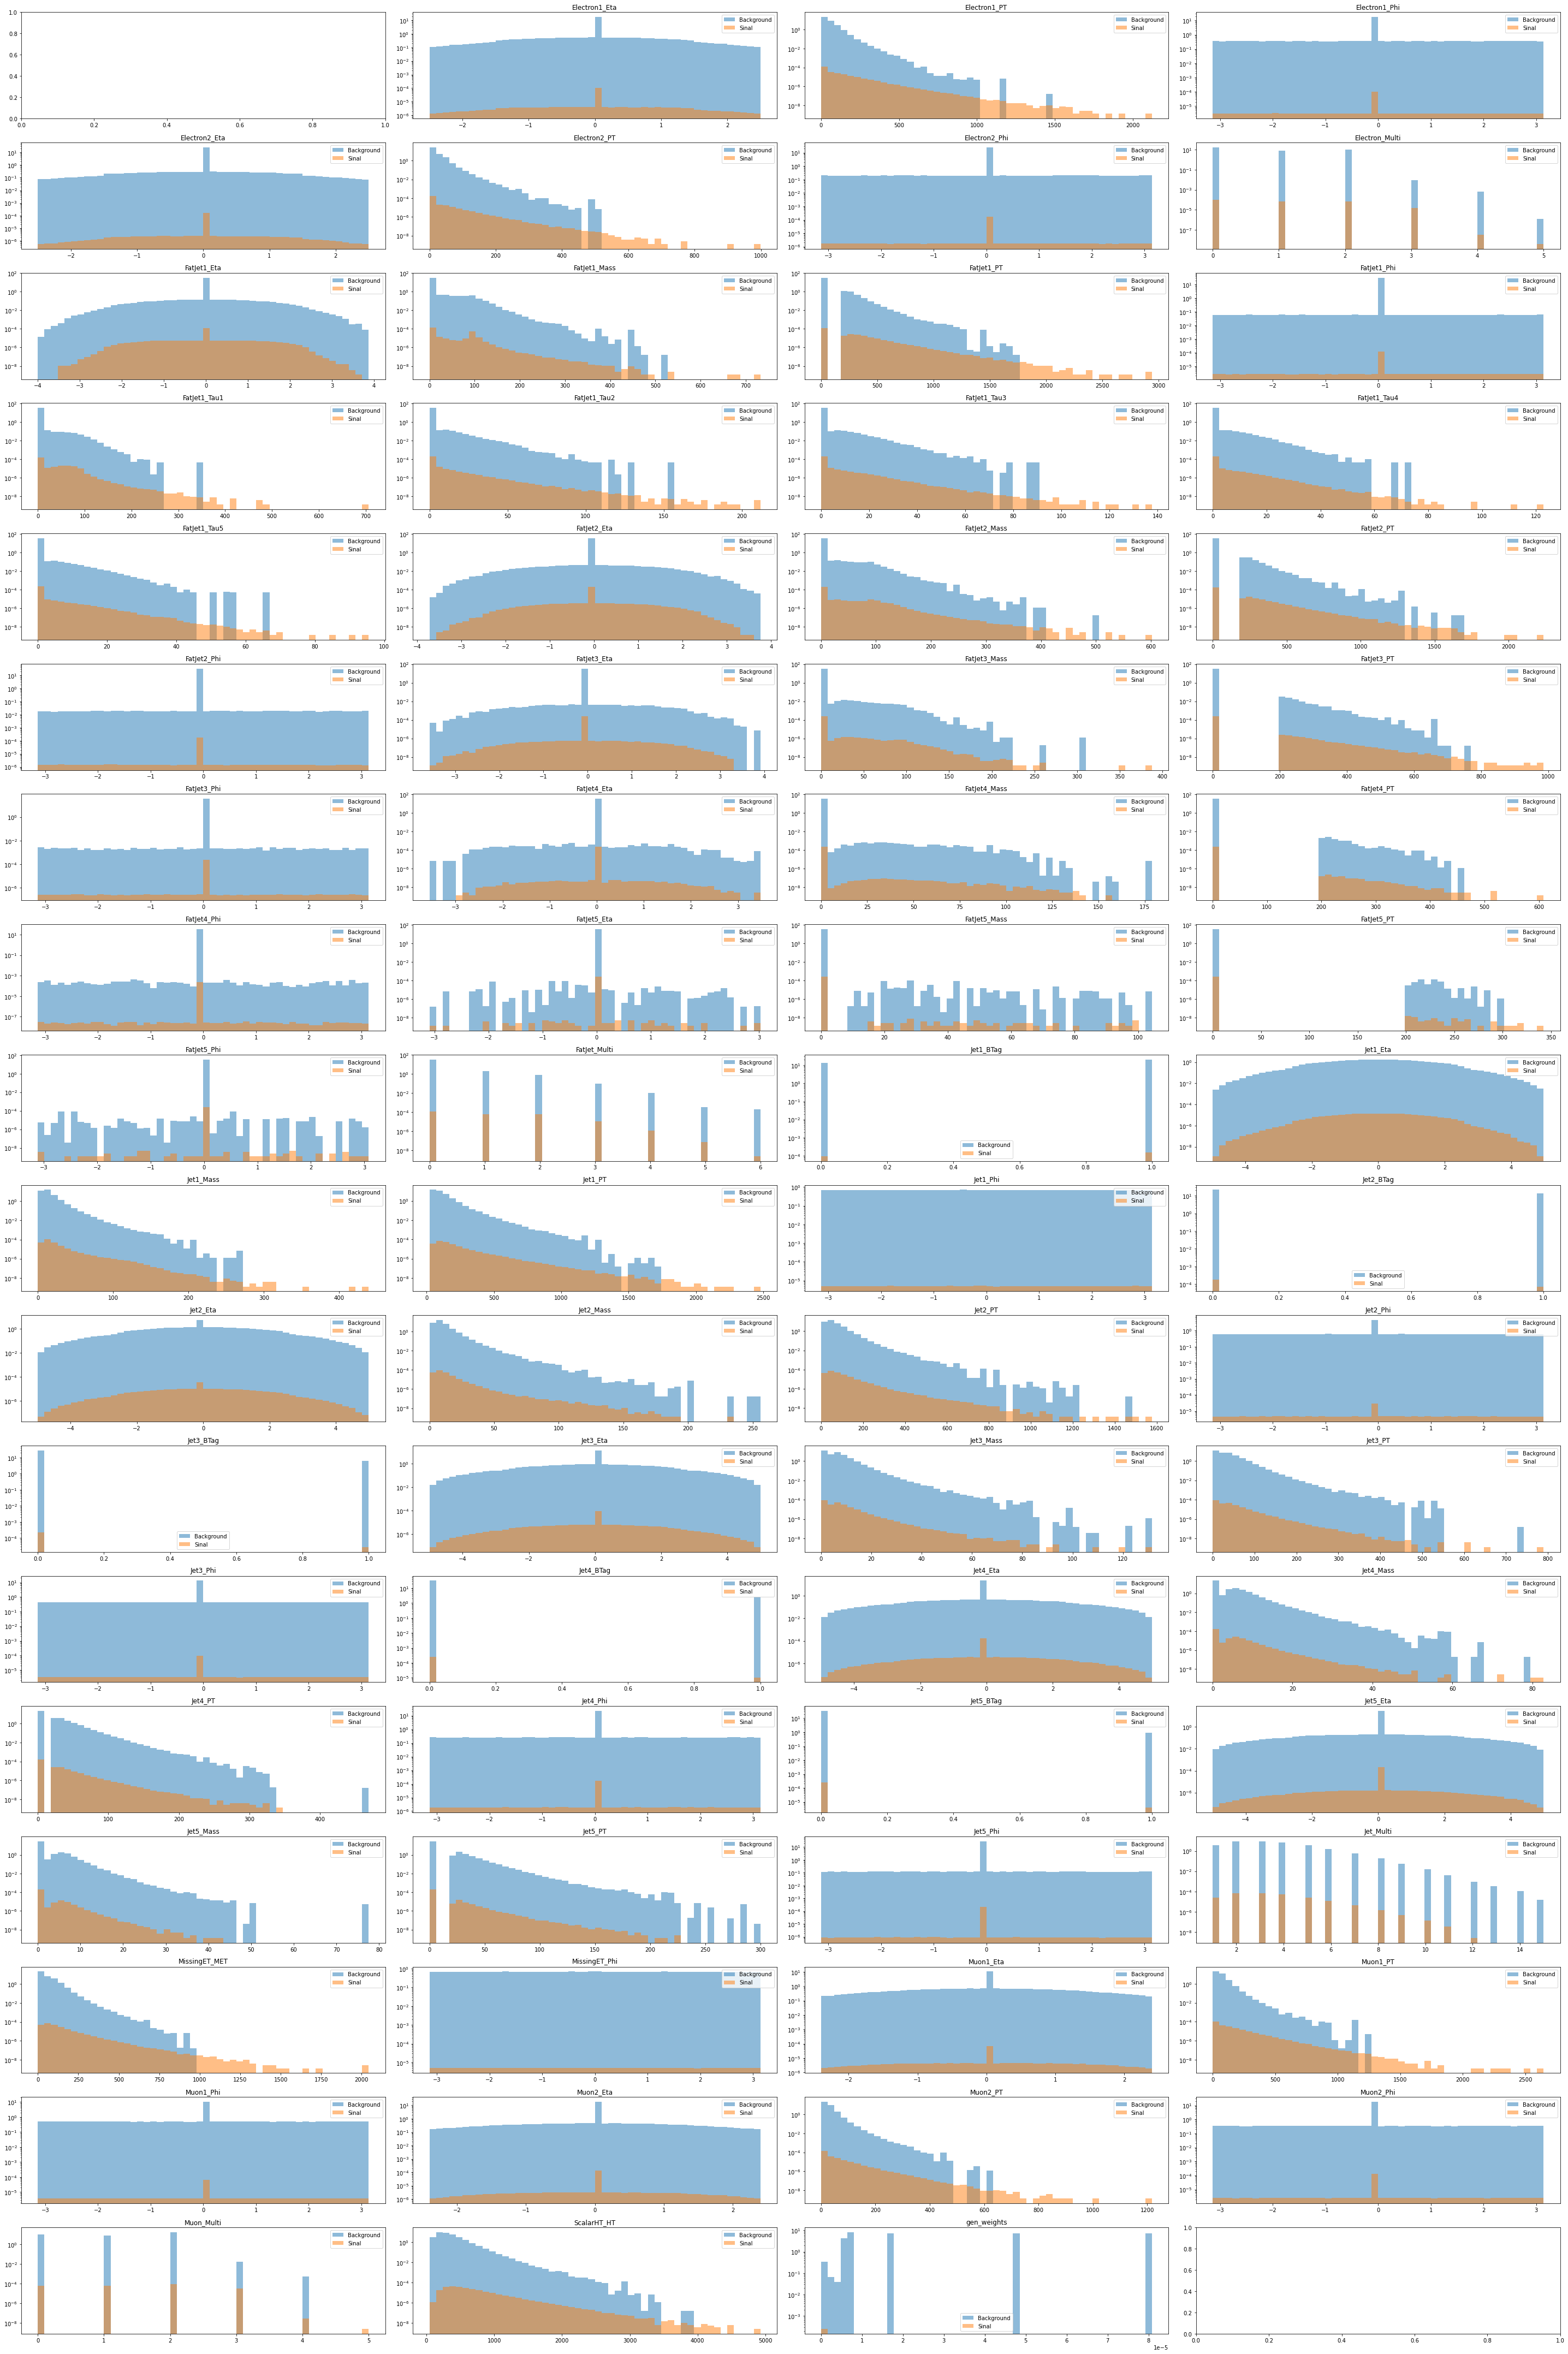

In [53]:
plot_graphs2(data_background,data_signal)